# TP1 - Parte 2 - Análisis de histogramas en imágenes en Escala de Grises

En esta parte del trabajo se analizan imágenes en escala de grises mediante el cálculo y la comparación de sus histogramas de intensidad. Los histogramas permiten estudiar la distribución de los valores de brillo en una imagen, proporcionando información útil sobre su iluminación, contraste y composición tonal general.

Este tipo de análisis es especialmente útil en tareas de clasificación de imágenes o como paso previo a técnicas de segmentación y detección de objetos.

Los objetivos de esta parte son:

- Cargar y visualizar dos imágenes (`img1_tp.png` y `img2_tp.png`) en escala de grises.
- Calcular y graficar sus histogramas de intensidad.
- Analizar si los histogramas pueden ser útiles como *features* para modelos de clasificación/detección.


In [2]:
%matplotlib inline

import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Cargar imágenes en modo monocromático (un canal)
img1 = cv.imread('images/img1_tp.png', cv.IMREAD_GRAYSCALE)
img2 = cv.imread('images/img2_tp.png', cv.IMREAD_GRAYSCALE)

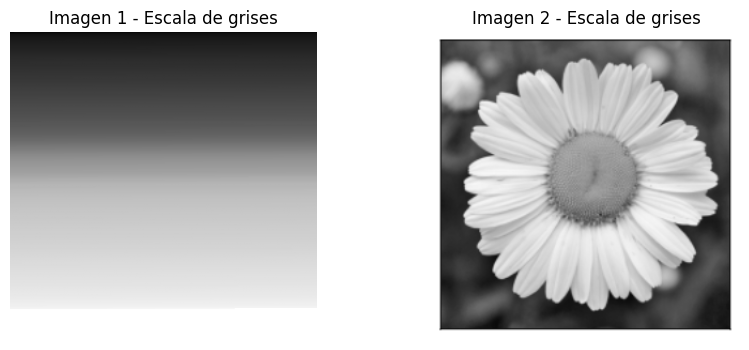

In [4]:
# Visualizar imágenes
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.imshow(img1, cmap='gray')
plt.title('Imagen 1 - Escala de grises')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(img2, cmap='gray')
plt.title('Imagen 2 - Escala de grises')
plt.axis('off')
plt.show()

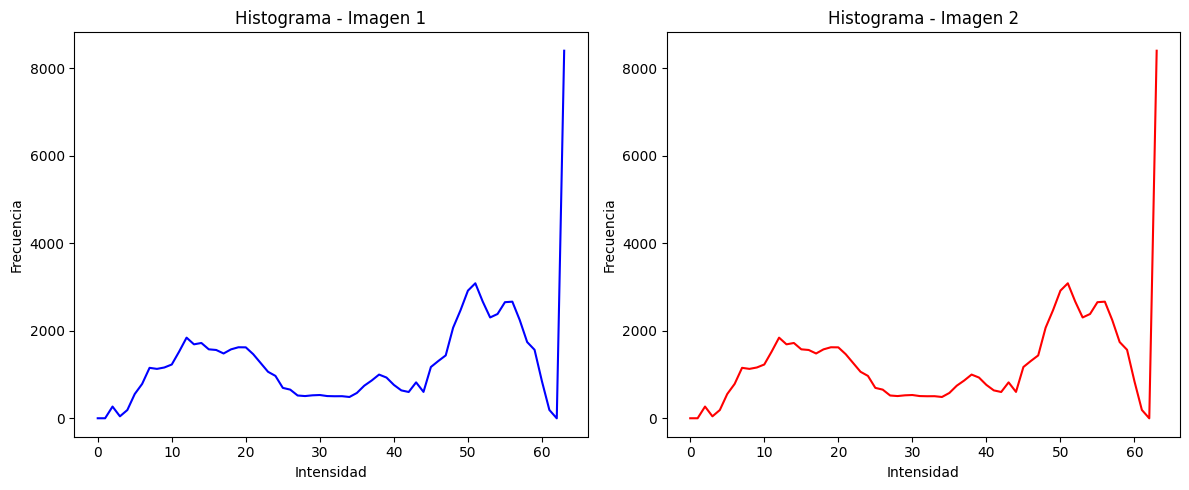

In [5]:
# Calcular y mostrar histogramas
bins = 64
hist1 = cv.calcHist([img1], [0], None, [bins], [0, 256])
hist2 = cv.calcHist([img2], [0], None, [bins], [0, 256])

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(hist1, color='blue')
plt.title('Histograma - Imagen 1')
plt.xlabel('Intensidad')
plt.ylabel('Frecuencia')

plt.subplot(1,2,2)
plt.plot(hist2, color='red')
plt.title('Histograma - Imagen 2')
plt.xlabel('Intensidad')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

### Análisis comparativo de histogramas

Al representar los histogramas de ambas imágenes en escala de grises, se observa que:

- La distribución de intensidades en ambas imágenes es muy similar.
- Existe un **pico muy marcado en el último bin**, lo que indica una gran cantidad de píxeles con intensidad máxima (255), probablemente debido a saturación o fondo blanco.

#### ¿Sirven como features para un modelo de clasificación?

Un histograma de intensidades refleja cómo se distribuyen los valores de brillo en la imagen, sin importar dónde aparecen. Esto lo convierte en un descriptor global útil para detectar diferencias en:

- Iluminación general
- Contraste
- Composición tonal (predominio de claros u oscuros)

**Ventajas**:
- Simples de calcular.
- Robustez frente a pequeñas transformaciones espaciales.

**Limitaciones**:
- No capturan información espacial.
- Poco efectivos si las diferencias entre clases son locales o estructurales (formas, bordes).

En este caso particular, **los histogramas de ambas imágenes son extremadamente similares: tienen una distribución suave y muy parecida**, con un gran pico en el bin más alto (intensidad cercana a 255). Esto sugiere que las imágenes tienen niveles de luminosidad y composición tonal muy similares.

Por lo tanto **la respuesta es no, en este caso puntual los histogramas no serían muy útiles como features para un modelo de clasificación o detección**.
Dado que las diferencias entre las imágenes no se reflejan claramente en los histogramas, un modelo basado únicamente en esta información no podría distinguir entre ellas con eficacia.

**Justificación**:

- Ambos histogramas están dominados por intensidades altas (posiblemente por fondos blancos o saturación).
- Las variaciones espaciales (formas, patrones, bordes) no se capturan en el histograma.
- Si las diferencias entre las imágenes están en la disposición o presencia de objetos específicos, el histograma no va a reflejar eso.

## Sección complementaria: ecualización de histogramas

Dado que los histogramas presentaron un pico muy marcado, además de zonas de picos y valles, realizaremos un procesamiento mediante ecualización del histograma para analizar su efecto en la imagen

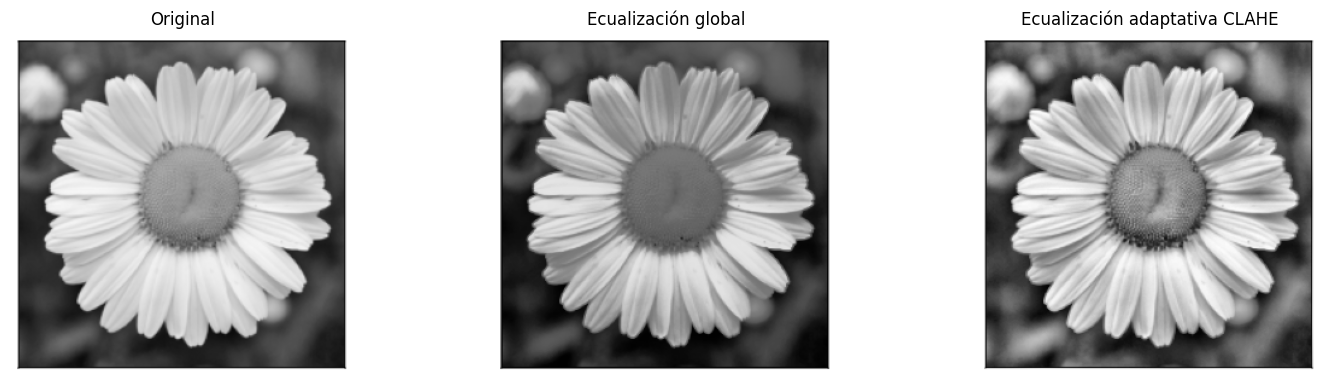

In [15]:
# Ecualización global
img_eqzd = cv.equalizeHist(img2)
hist_eqzd = cv.calcHist([img_eqzd], [0], None, [bins], [0, 256])

# Ecualización CLAHE
clahe = cv.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
img_eqzd_clahe = clahe.apply(img2)
hist_eqzd_clahe = cv.calcHist([img_eqzd_clahe], [0], None, [bins], [0, 256])


# Visualización comparativa
plt.figure(figsize=(15,4))

plt.subplot(1,3,1)
plt.imshow(img2, cmap='gray')
plt.title("Original")
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(img_eqzd, cmap='gray')
plt.title("Ecualización global")
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(img_eqzd_clahe, cmap='gray')
plt.title("Ecualización adaptativa CLAHE")
plt.axis('off')


plt.tight_layout()
plt.show()

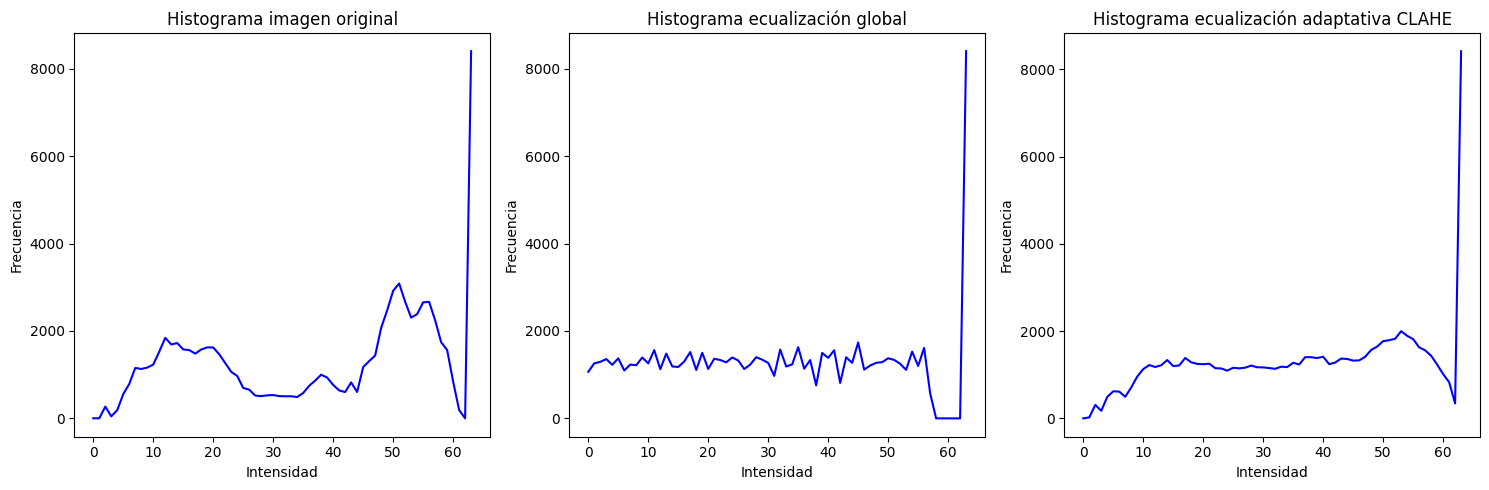

In [16]:
# Visualización histogramas
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.plot(hist2, color='blue')
plt.title('Histograma imagen original')
plt.xlabel('Intensidad')
plt.ylabel('Frecuencia')

plt.subplot(1,3,2)
plt.plot(hist_eqzd, color='blue')
plt.title('Histograma ecualización global')
plt.xlabel('Intensidad')
plt.ylabel('Frecuencia')

plt.subplot(1,3,3)
plt.plot(hist_eqzd_clahe, color='blue')
plt.title('Histograma ecualización adaptativa CLAHE')
plt.xlabel('Intensidad')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

Se observa en las imágenes que:
- Ambas ecualizaciones aumentan el contraste y resaltan detalles de la imagen, haciendo que por ejemplo rasgos de los pétalos queden más distinguibles
- La ecualización global altera algunos aspectos de la imagen, por ejemplo introduciendo una sombra en la parte superior no presente en forma pronunciada en la original
- La ecualización adaptativa logra el efecto de contraste manteniendo mejor el aspecto original
- A nivel de histogramas, la ecualización global muestra la distribución más uniforme, pero con picos, mientras que la adaptativa muestra un histograma más suavizado y con mayor uniformidad que el original aunque menor a la ecualización global


## Sección complementaria: binarización como alternativa de preprocesamiento

En esta sección se explora brevemente la técnica de **binarización de imágenes** vista en clase, como posible paso adicional de preprocesamiento para tareas de clasificación o segmentación. Aunque no formaba parte de los objetivos centrales del TP, se considera relevante su inclusión como método complementario.

Se compara la imagen original en escala de grises con dos versiones binarizadas: una mediante umbral fijo y otra mediante umbral adaptativo.

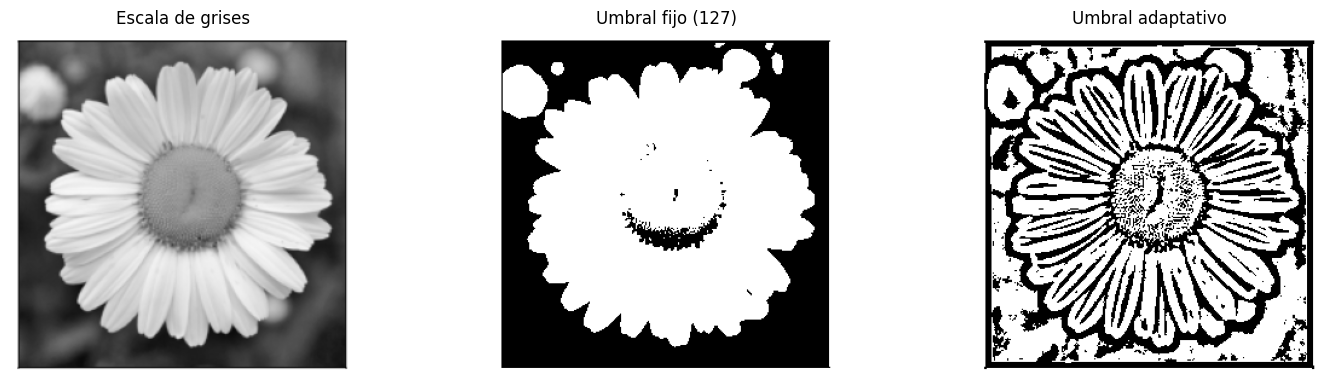

In [35]:
# Binarización con umbral fijo
_, thresh_fixed = cv.threshold(img2, 127, 255, cv.THRESH_BINARY)

# Binarización con umbral adaptativo
thresh_adapt = cv.adaptiveThreshold(img2, 255,
                                     cv.ADAPTIVE_THRESH_MEAN_C,
                                     cv.THRESH_BINARY,
                                     blockSize=11,
                                     C=2)

# Visualización comparativa
plt.figure(figsize=(15,4))

plt.subplot(1,3,1)
plt.imshow(img2, cmap='gray')
plt.title("Escala de grises")
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(thresh_fixed, cmap='gray')
plt.title("Umbral fijo (127)")
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(thresh_adapt, cmap='gray')
plt.title("Umbral adaptativo")
plt.axis('off')

plt.tight_layout()
plt.show()

### Conclusión

La binarización puede ser útil como paso previo para ciertas tareas de visión por computadora, como detección de contornos, segmentación o conteo de objetos.

- El **umbral fijo** funciona bien cuando hay un contraste claro entre fondo y objeto.
- El **umbral adaptativo** se adapta mejor a imágenes con iluminación no uniforme.

En el contexto de este TP, estas técnicas podrían complementar el análisis con histogramas si se busca separar estructuras relevantes o preparar las imágenes para métodos basados en contorno o morfología.

## Conclusión Final

En esta segunda parte del trabajo se abordó el análisis de imágenes en escala de grises mediante histogramas de intensidad. Se realizó una comparación visual y estadística de dos imágenes (`img1_tp.png` y `img2_tp.png`), evaluando si esta herramienta puede ser útil para tareas de clasificación o detección en visión por computadora.

A partir del análisis realizado, se concluye que:

- Los histogramas permiten visualizar la distribución tonal general de una imagen y pueden ser útiles como descriptor global.
- En este caso particular, las imágenes analizadas presentaron histogramas muy similares, lo que sugiere que **no serían discriminativos por sí solos** para una tarea de clasificación.
- El histograma pierde información espacial, por lo que **no es suficiente para tareas que requieren entender la estructura o forma de los objetos** en la imagen.

Finalmente, se presentaron secciones complementarias sobre **ecualización de histogramas** y **binarización**, ésta última ejemplo de preprocesamiento útil en tareas de segmentación o análisis estructural.